# Loading packages 

In [1]:
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, precision_score, recall_score

from sklearn.svm import SVC

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

# Loading dataset

In [2]:
mnist = load_digits()
mnist.data.shape

(1797, 64)

# Samples

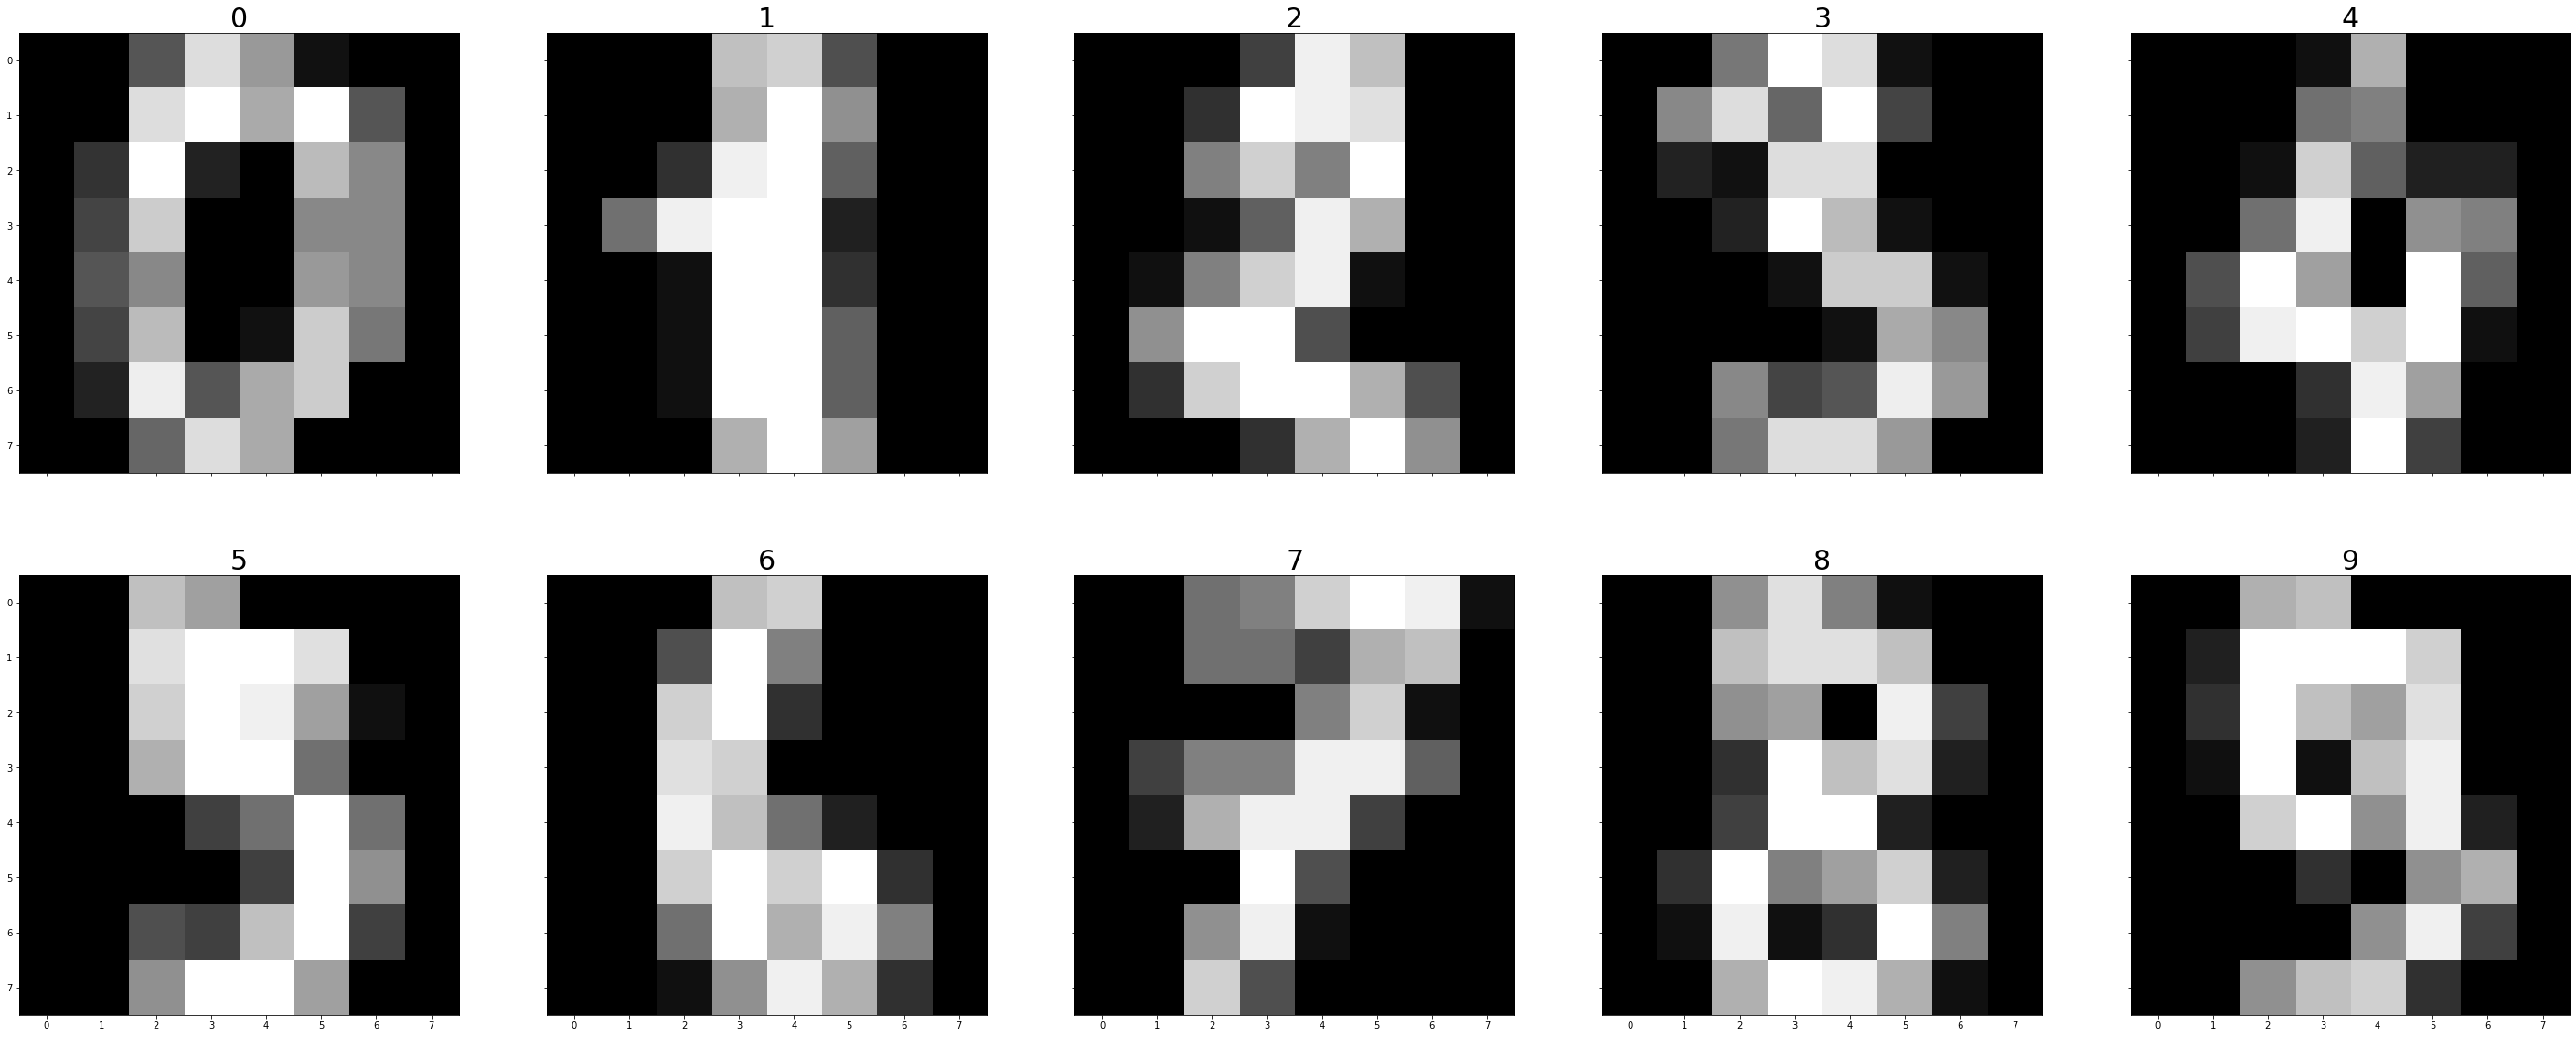

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(50, 20), sharex=True, sharey=True)

for i, ax in enumerate(axes.reshape(-1)):
    ax.imshow(mnist.images[i],cmap='gray')
    ax.set_title(str(mnist.target[i]),fontdict={'fontsize':30})

plt.savefig('images/samples.png')

# Binary Classifier

> Building binary classifer to classify digit as 'zero' or 'not zero'

In [4]:
is_zero = [1 if target==0 else 0 for target in mnist.target]
is_zero[:10]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, is_zero, test_size=0.2, random_state=0)
X_test.shape

(360, 64)

In [6]:
Binary_clf = SVC()
Binary_clf.fit(X_train, y_train)
predictions = Binary_clf.predict(X_test)

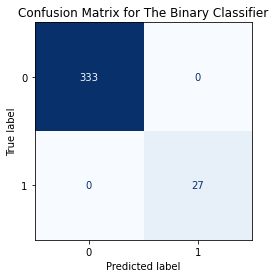

In [7]:
plot_confusion_matrix(Binary_clf, X_test, y_test, cmap='Blues', colorbar=False)
plt.title('Confusion Matrix for The Binary Classifier')
plt.savefig('images/confusion_matrix_BC.png')

def print_metrics(predictions, y_test, average = 'binary'):
    print('Accuracy:{:0.2f}%, Precision: {:0.2f}%, Recall:{:0.2f}%'.format(\
            accuracy_score(predictions, y_test)*100,
            precision_score(predictions, y_test, average=average)*100,
            recall_score(predictions, y_test, average=average)*100))


In [8]:
print_metrics(predictions, y_test)

Accuracy:100.00%, Precision: 100.00%, Recall:100.00%


# Multi-class Classifier
> Building multi-class classifier for each hand-written digit class [0, 1, .., 9]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=0)

In [10]:
MM_clf = SVC()
MM_clf.fit(X_train, y_train)
predictions = MM_clf.predict(X_test)

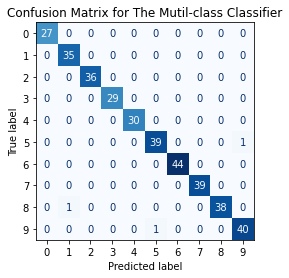

In [11]:
plot_confusion_matrix(MM_clf, X_test, y_test, cmap='Blues', colorbar=False)
plt.title('Confusion Matrix for The Mutil-class Classifier')
plt.savefig('images/confusion_matrix_MCC.png')

In [12]:
print_metrics(predictions, y_test, average = 'micro')

Accuracy:99.17%, Precision: 99.17%, Recall:99.17%
